In [1]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import glob
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Embedding, Flatten
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
!git clone https://github.com/florex/resume_corpus

Cloning into 'resume_corpus'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 50 (delta 16), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (50/50), done.


In [3]:
os.listdir('/content')

['.config', 'resume_corpus', 'sample_data']

In [4]:
os.listdir('/content/resume_corpus')

['skills_it.txt',
 '.git',
 'README.md',
 'resumes_corpus.zip',
 'normlized_classes.txt',
 'resume_samples.zip']

In [5]:
import zipfile
from zipfile import ZipFile
zip_ref = zipfile.ZipFile('/content/resume_corpus/resumes_corpus.zip','r')
zip_ref.extractall('/tmp/resumes_corpus')
zip_ref.close()

base_dir = '/tmp/resumes_corpus'

In [6]:
os.listdir('/tmp/resumes_corpus')

['04565.txt',
 '00303.lab',
 '05346.lab',
 '14981.lab',
 '17655.lab',
 '00155.lab',
 '10936.txt',
 '17752.lab',
 '23865.txt',
 '24568.txt',
 '28052.txt',
 '17319.txt',
 '26885.lab',
 '12015.txt',
 '12534.lab',
 '01524.txt',
 '11489.txt',
 '11810.lab',
 '19508.txt',
 '13305.lab',
 '05621.lab',
 '29641.lab',
 '29024.lab',
 '22157.txt',
 '21449.txt',
 '07646.txt',
 '02409.txt',
 '18270.lab',
 '12973.txt',
 '11149.lab',
 '20796.lab',
 '17966.lab',
 '20627.txt',
 '10341.txt',
 '01084.lab',
 '14298.txt',
 '14870.txt',
 '04489.lab',
 '11555.txt',
 '16559.lab',
 '17070.lab',
 '10623.lab',
 '05140.txt',
 '08855.lab',
 '07797.lab',
 '24139.lab',
 '06521.txt',
 '05354.lab',
 '13711.lab',
 '04989.lab',
 '14613.txt',
 '23942.txt',
 '00445.txt',
 '21108.txt',
 '27252.txt',
 '28676.lab',
 '20175.txt',
 '17181.lab',
 '03623.lab',
 '26065.lab',
 '07667.txt',
 '12378.lab',
 '03191.txt',
 '19860.lab',
 '09496.lab',
 '07426.lab',
 '17037.txt',
 '00721.lab',
 '13925.lab',
 '11004.txt',
 '24179.lab',
 '2948

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
y = []
filelist = glob.glob(os.path.join(base_dir, '*.lab'))
for infile in sorted(filelist): 
  with open(infile) as f:              
    temp = f.readline()
    y.append(pd.Series(temp.rstrip('\n')))
y = np.array(y)
len(y)
pd.DataFrame(np.array(y)).to_csv("/content/drive/MyDrive/Colab Notebooks/jurnal/lab.csv",index=None)

In [9]:
len(y)

29783

In [10]:
x = []
filelistx = glob.glob(os.path.join(base_dir, '*.txt'))
for infile in sorted(filelistx): 
  with open(infile,encoding = "ISO-8859-1") as f:              
    temp = f.readline()
    x.append(pd.Series([temp.rstrip('\n')]))
x = np.array(x)
len(x)
pd.DataFrame(np.array(x)).to_csv("/content/drive/MyDrive/Colab Notebooks/jurnal/corpus.csv",index=None)

In [11]:
len(x)

29783

In [12]:
lab = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jurnal/lab.csv')
resume = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jurnal/corpus.csv')
list_of_tuples = list(zip(lab['0'], resume['0'])) 
df = pd.DataFrame(list_of_tuples,
                  columns = ['Job', 'Resume']) 

In [13]:
#drop kolom yang null value

df.dropna(subset = ["Job"], inplace=True)
df.isnull().any() 
pd.DataFrame(df).to_csv("/content/drive/MyDrive/Colab Notebooks/jurnal/df.csv",index=None)

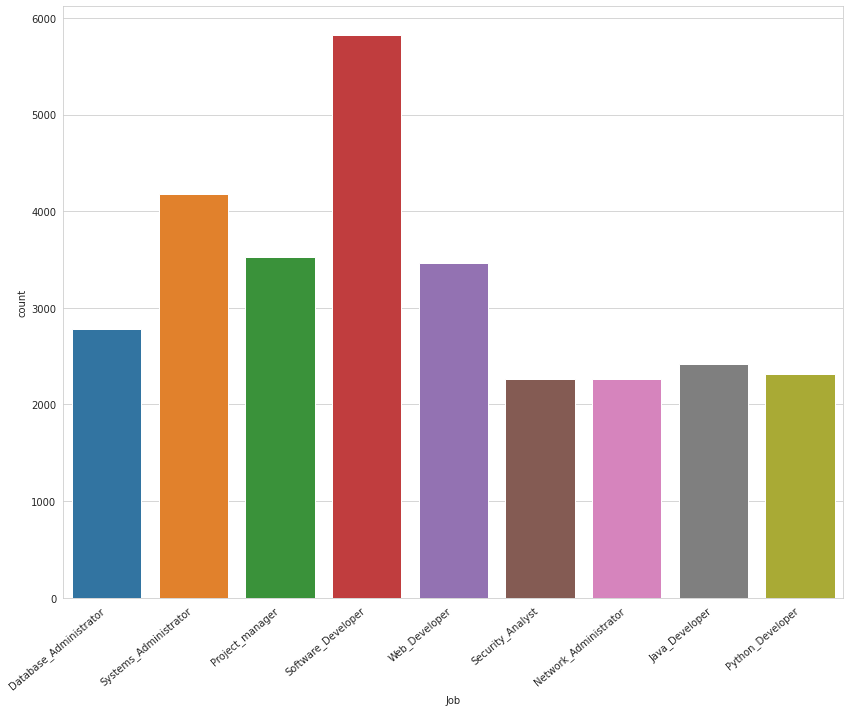

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Job', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [15]:
df.head(11)

,Job,Resume
0,Database_Administrator,"Database Administrator <span class=""hl"">Databa..."
1,Database_Administrator,"Database Administrator <span class=""hl"">Databa..."
2,Database_Administrator,Oracle Database Administrator Oracle <span cla...
3,Database_Administrator,Amazon Redshift Administrator and ETL Develope...
4,Database_Administrator,Scrum Master Scrum Master Scrum Master Richmon...
5,Database_Administrator,Oracle Database Administrator Oracle <span cla...
6,Database_Administrator,Oracle Database Administrator Oracle <span cla...
7,Database_Administrator,Lead Database Administrator/Developer Lead <sp...
8,Database_Administrator,Database Administrator / Database Developer <s...
9,Database_Administrator,Oracle Database Administrator Oracle <span cla...


In [16]:
df.Job.value_counts()

Software_Developer        5828
Systems_Administrator     4182
Project_manager           3527
Web_Developer             3466
Database_Administrator    2784
Java_Developer            2418
Python_Developer          2311
Network_Administrator     2260
Security_Analyst          2259
Name: Job, dtype: int64

In [17]:
Software_Developer = df[df.Job == 'Software_Developer']
Software_Developer = Software_Developer[0:2200]

Systems_Administrator = df[df.Job == 'Systems_Administrator']
Systems_Administrator = Systems_Administrator[0:2200]

Project_manager = df[df.Job == 'Project_manager']
Project_manager = Project_manager[0:2200]

Web_Developer = df[df.Job == 'Web_Developer']
Web_Developer = Web_Developer[0:2200]

Database_Administrator = df[df.Job == 'Database_Administrator']
Database_Administrator = Database_Administrator[0:2200]

Java_Developer = df[df.Job == 'Java_Developer']
Java_Developer = Java_Developer[0:2200]

Python_Developer = df[df.Job == 'Python_Developer']
Python_Developer = Python_Developer[0:2200]

Network_Administrator = df[df.Job == 'Network_Administrator']
Network_Administrator = Network_Administrator[0:2200]

Security_Analyst = df[df.Job == 'Security_Analyst']
Security_Analyst = Security_Analyst[0:2200]

In [18]:
df = pd.concat([Web_Developer, Database_Administrator, Java_Developer, Python_Developer, Security_Analyst])

In [19]:
pd.DataFrame(df).to_csv("/content/drive/MyDrive/Colab Notebooks/jurnal/querydata.csv",index=None)

In [20]:
newdf = df.sample(frac=1).reset_index(drop=True)
pd.DataFrame(newdf).to_csv("/content/drive/MyDrive/Colab Notebooks/jurnal/newdf.csv",index=None)

In [21]:
df.Job.value_counts()

Web_Developer             2200
Database_Administrator    2200
Java_Developer            2200
Python_Developer          2200
Security_Analyst          2200
Name: Job, dtype: int64

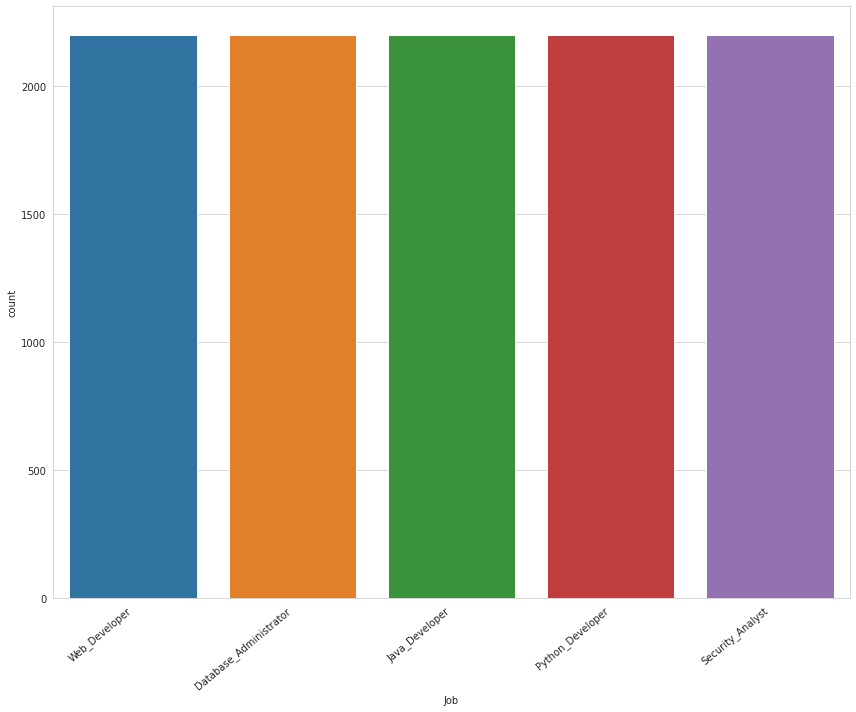

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Job', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [23]:
vocab_size = 10000
embedding_dim = 64
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
test_portion = .2

In [24]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ,"span", "class", "hl"]

In [25]:
def clean_text(sentence):
    for word in stopwords:
      token = " " + word + " "
      sentence = str(sentence).replace(token, " ")
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [26]:
with open("/content/drive/MyDrive/Colab Notebooks/jurnal/newdf.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
      if any(c.isalpha() for c in row[0])==True and any(c.isalpha() for c in row[1])==True:
        labels.append(row[0])
        sen = row[1]
        sentence = clean_text(sen)
        sentences.append(sentence)
      else:
        pass

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * len(sentences))

test_sequences = padded[0:split]
training_sequences = padded[split:]
test_labels = labels[0:split]
training_labels = labels[split:]

In [28]:
label_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))

In [29]:
len(training_label_seq) #data training

8800

In [30]:
len(validation_label_seq) #data validation

2200

In [31]:
label_index = label_tokenizer.word_index
list(label_index.items())

[('java_developer', 1),
 ('python_developer', 2),
 ('database_administrator', 3),
 ('security_analyst', 4),
 ('web_developer', 5)]

In [32]:
training_label_seq

array([[5],
       [5],
       [2],
       ...,
       [2],
       [5],
       [2]])

In [33]:
df

,Job,Resume
55,Web_Developer,Web Developer Web Developer Web Developer Work...
521,Web_Developer,Web Developer/IT Support Web Developer/IT Supp...
644,Web_Developer,"Full-Stack Web Developer, freelance Full-Stack..."
735,Web_Developer,WEB DESIGNER & DEVELOPER WEB DESIGNER &amp; DE...
744,Web_Developer,Sales & Marketing Associate Sales &amp; Market...
...,...,...
16437,Security_Analyst,Information Security specialist/Desktop Suppor...
16543,Security_Analyst,INFORMATION SECURITY ANALYST INFORMATION SECUR...
16608,Security_Analyst,Sr Security Specialist Sr Security Specialist ...
16626,Security_Analyst,Cyber Security Analyst Cyber Security Analyst ...


In [34]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.85):
      print('\nYeay, akurasi memenuhi target!')
      self.model.stop_training = True

callbacks = myCallback()

In [35]:
model = tf.keras.Sequential([
          tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
          tf.keras.layers.LSTM(64, return_sequences=True),
          tf.keras.layers.LSTM(128, kernel_regularizer=(tf.keras.regularizers.L2(0.001)), recurrent_regularizer=(tf.keras.regularizers.L2(0.001))),
          #tf.keras.layers.Dropout(0.1),
          tf.keras.layers.Dropout(0.9),
          #tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          #tf.keras.layers.Dense(32, activation='relu'),
          #tf.keras.layers.Dense(embedding_dim, activation='relu', kernel_regularizer=(tf.keras.regularizers.L2(0.001))),
          tf.keras.layers.Dense(10, activation='softmax')
])

#ADAM = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           5105152   
                                                                 
 lstm (LSTM)                 (None, 100, 64)           33024     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [36]:
num_epochs = 25

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(
    training_sequences, 
    training_label_seq,
    batch_size = 64,
    epochs=num_epochs,
    shuffle=True, 
    validation_data=(test_sequences, validation_label_seq), 
    verbose=1, 
    #callbacks=[callbacks])
    callbacks=[model_checkpoint_callback])

#history = model.fit(padded_train, y_train, epochs=25, validation_data=(padded_test, y_test), callbacks=[callbacks], batch_size=256)

model.load_weights(checkpoint_path)

Epoch 1/25
138/138 [==============================] - 48s 322ms/step - loss: 1.7132 - accuracy: 0.2509 - val_loss: 1.1893 - val_accuracy: 0.4009
Epoch 2/25
138/138 [==============================] - 44s 320ms/step - loss: 1.1610 - accuracy: 0.3910 - val_loss: 1.0884 - val_accuracy: 0.4014
Epoch 3/25
138/138 [==============================] - 44s 319ms/step - loss: 1.0518 - accuracy: 0.4383 - val_loss: 1.0883 - val_accuracy: 0.5382
Epoch 4/25
138/138 [==============================] - 43s 315ms/step - loss: 0.8498 - accuracy: 0.5740 - val_loss: 0.8914 - val_accuracy: 0.5573
Epoch 5/25
138/138 [==============================] - 44s 316ms/step - loss: 0.7656 - accuracy: 0.6099 - val_loss: 0.8367 - val_accuracy: 0.6377
Epoch 6/25
138/138 [==============================] - 43s 315ms/step - loss: 0.6959 - accuracy: 0.6775 - val_loss: 0.9550 - val_accuracy: 0.6859
Epoch 7/25
138/138 [==============================] - 43s 315ms/step - loss: 0.5921 - accuracy: 0.7414 - val_loss: 0.7244 - val_ac

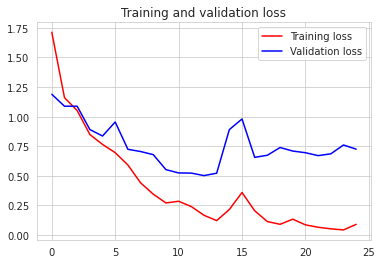

<Figure size 432x288 with 0 Axes>

In [37]:
#with regularization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

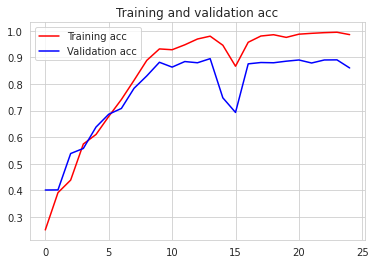

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend(loc=0)
plt.figure()
plt.show()

In [39]:
Software_Developer_test = df[df.Job == 'Software_Developer'].tail(100)

Systems_Administrator_test = df[df.Job == 'Systems_Administrator'].tail(100)

Project_manager_test = df[df.Job == 'Project_manager'].tail(100)

Web_Developer_test = df[df.Job == 'Web_Developer'].tail(100)

Database_Administrator_test = df[df.Job == 'Database_Administrator'].tail(100)

Java_Developer_test = df[df.Job == 'Java_Developer'].tail(100)

Python_Developer_test = df[df.Job == 'Python_Developer'].tail(100)

Security_Analyst_test = df[df.Job == 'Security_Analyst'].tail(100)


In [40]:
df_test = pd.concat([Web_Developer_test, Database_Administrator_test, Java_Developer_test, Python_Developer_test, Security_Analyst_test])

In [41]:
df_test

,Job,Resume
27934,Web_Developer,"Sr. Web Designer Sr. <span class=""hl"">Web</spa..."
27935,Web_Developer,"Caregiver Caregiver Web Developer 2 Oxnard, CA..."
27936,Web_Developer,"Sr. RoR Developer Sr. RoR <span class=""hl"">Dev..."
27937,Web_Developer,"Senior PHP Developer Senior PHP <span class=""h..."
27938,Web_Developer,"Full Stack Developer Full Stack <span class=""h..."
...,...,...
16437,Security_Analyst,Information Security specialist/Desktop Suppor...
16543,Security_Analyst,INFORMATION SECURITY ANALYST INFORMATION SECUR...
16608,Security_Analyst,Sr Security Specialist Sr Security Specialist ...
16626,Security_Analyst,Cyber Security Analyst Cyber Security Analyst ...


In [42]:
predictions_label= []
for i in range (500):
  labs = [list(label_index.keys())]
  inputs = df_test['Resume'].iloc[i]
  clean_inputs = [clean_text(inputs)]
  #print(str(clean_inputs)+'\n')
  seq = tokenizer.texts_to_sequences(clean_inputs)
  padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  #print(str(padded)+'\n')
  proba = model.predict(padded)[0,1:]
  #print only max value
  max = np.where(proba == np.amax(proba))
  for [i] in max:
    idx = i
  predlabel = labs[0][idx]
  predprob = proba[idx]*100
  
  #print(list(map("This resume is fit to {} jobs with probability of {:.2f}%".format,[predlabel],[predprob])))
  predictions_label.append(predlabel)

  #for (label, p) in zip(labs, [proba[::-1]]):
    #print("Probability for each classes are : " + str(list(map("{}: {:.2f}%".format,label,p*100))))


In [43]:
predictions_label

['web_developer',
 'web_developer',
 'web_developer',
 'python_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'java_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_developer',
 'web_

In [44]:
df_test['predictions label'] = predictions_label

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
actual_label = df_test['Job'].str.lower()

In [47]:
confusion_matrix(actual_label, predictions_label)

array([[ 98,   1,   1,   0,   0],
       [  1,  96,   3,   0,   0],
       [  0,   0, 100,   0,   0],
       [  0,   0,   0, 100,   0],
       [  0,   1,   3,   0,  96]])

In [48]:
label_index.keys()

dict_keys(['java_developer', 'python_developer', 'database_administrator', 'security_analyst', 'web_developer'])

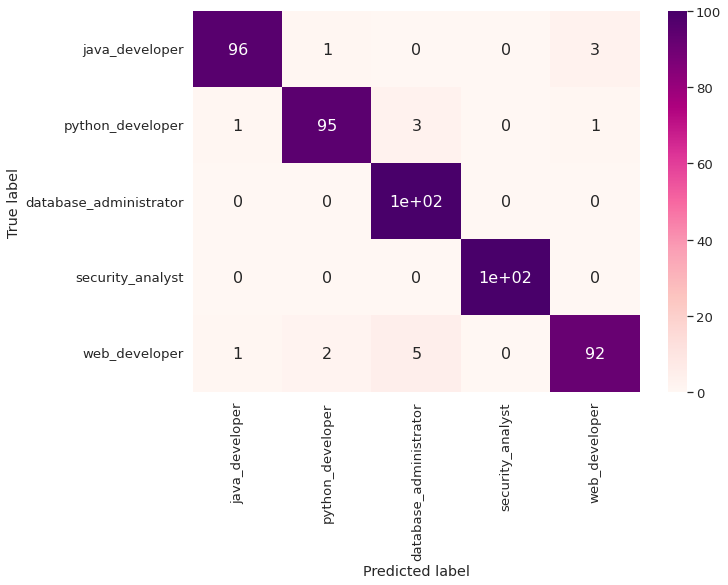

In [49]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[ 96,   1,   0,   0,   3],
       [  1,  95,   3,   0,   1],
       [  0,   0, 100,   0,   0],
       [  0,   0,   0, 100,   0],
       [  1,   2,   5,   0,  92]]

df_cm = pd.DataFrame(array, index = [i for i in label_index.keys()],
                  columns = [i for i in label_index.keys()])
plt.figure(figsize = (10,7))
#sn.heatmap(df_cm, annot=True)# plt.figure(figsize=(10,7))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True,cmap="RdPu", annot_kws={"size": 16}) # font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
from sklearn.metrics import f1_score, precision_score, recall_score #pip install sklearn
print('Recall: {}'.format(recall_score(actual_label, predictions_label,average=None)))
print('Precision: {}'.format(precision_score(actual_label, predictions_label,average=None)))
print('F1-Score: {}'.format(f1_score(actual_label, predictions_label,average=None)))

Recall: [0.98 0.96 1.   1.   0.96]
Precision: [0.98989899 0.97959184 0.93457944 1.         1.        ]
F1-Score: [0.98492462 0.96969697 0.96618357 1.         0.97959184]


In [51]:
recall = recall_score(actual_label, predictions_label,average=None)
precision=precision_score(actual_label, predictions_label,average=None)
f1_score=f1_score(actual_label, predictions_label,average=None)

In [52]:
data = {'Recall':recall, 'Precisions':precision, 'F1-Score':f1_score}  
  
# Creates pandas DataFrame.  
data_evaluasi = pd.DataFrame(data, index =label_index.keys())  
  
# print the data  
print(data_evaluasi)  

                        Recall  Precisions  F1-Score
java_developer            0.98    0.989899  0.984925
python_developer          0.96    0.979592  0.969697
database_administrator    1.00    0.934579  0.966184
security_analyst          1.00    1.000000  1.000000
web_developer             0.96    1.000000  0.979592


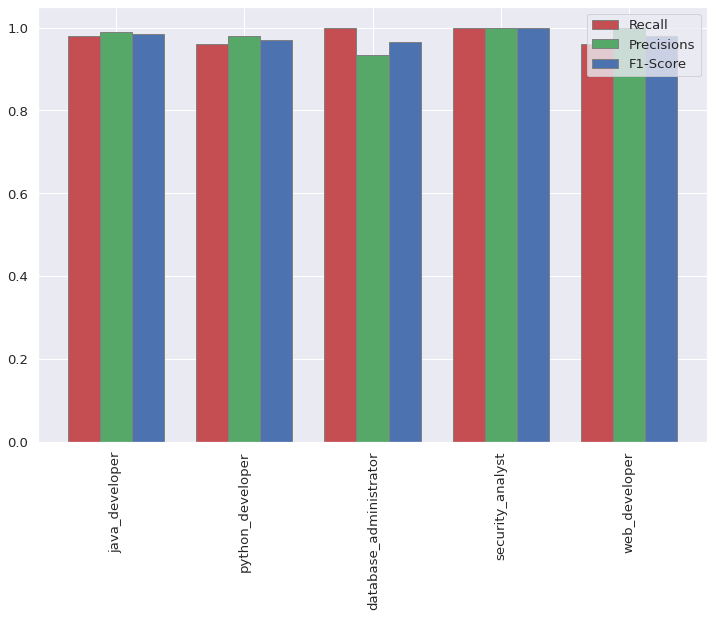

In [53]:
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
  
# Set position of bar on X axis
br1 = np.arange(len(data_evaluasi['Recall']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, data_evaluasi['Recall'], color ='r', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br2, data_evaluasi['Precisions'], color ='g', width = barWidth,
        edgecolor ='grey', label ='Precisions')
plt.bar(br3, data_evaluasi['F1-Score'], color ='b', width = barWidth,
        edgecolor ='grey', label ='F1-Score')
 
# Adding Xticks
plt.xticks([r + barWidth for r in range(len(data_evaluasi['Recall']))],label_index.keys(),rotation='vertical')
 
plt.legend()
plt.show()